In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data1 = pd.read_csv('DailyOrder1-100.csv')
data2 = pd.read_csv('DailyOrder100-210.csv')
data = pd.concat([data1,data2])
data.loc[data['ChannelName'].isin(['Bar','Dining Room','Bar Dining','Patio']),'ChannelName'] = 'On-Premise'
data.loc[data['ChannelName'].isin(['Banquet','Café']),'ChannelName'] = 'Banquet'
data['BusinessDate'] = pd.to_datetime(data['BusinessDate'])

In [4]:
data = data[data['ChannelName']!='Banquet']

In [5]:
data['DessertOnlyChecksCnt'] = data['DessertOnlyChecksCnt'].fillna(0)

In [7]:
data = data.groupby(['StoreKey','BusinessDate','ChannelName','DessertOnlyChecksCnt']).agg({'NumOrder':'sum','SalesAmt':'sum'}).reset_index()

In [8]:
data = data[data['DessertOnlyChecksCnt']==0]

In [9]:
data.head()

,StoreKey,BusinessDate,ChannelName,DessertOnlyChecksCnt,NumOrder,SalesAmt
0,1,2017-01-04,On-Premise,0.0,333,15056.39
1,1,2017-01-04,To Go Sales,0.0,121,3590.27
2,1,2017-01-05,On-Premise,0.0,357,16221.75
3,1,2017-01-05,To Go Sales,0.0,123,3232.03
4,1,2017-01-06,On-Premise,0.0,382,17688.98


In [10]:
data['Month'] = data['BusinessDate'].dt.month
data['Year'] = data['BusinessDate'].dt.year
data['MonthName'] = data['BusinessDate'].dt.month_name() +', '+data['BusinessDate'].dt.year.astype('str')

In [11]:
c = data['ChannelName'].unique()

In [12]:
s = data['StoreKey'].value_counts().index[0:100]

In [ ]:
#k = data['AKOMName'].unique()

In [13]:
data['ChannelType'] = np.where(data['ChannelName'].isin(['Delivery','Digital','To Go Sales']), 'Off-Premise','On-Premise')

In [14]:
offsite_percent = data.groupby(['StoreKey','ChannelType'])['NumOrder','SalesAmt'].mean().unstack()
offsite_percent = offsite_percent.fillna(0)

In [16]:
offsite_percent['TotalOrder'] = offsite_percent[('NumOrder','Off-Premise')] + offsite_percent[('NumOrder','On-Premise')]
offsite_percent['TotalAmt'] = offsite_percent[('SalesAmt','Off-Premise')] + offsite_percent[('SalesAmt','On-Premise')]

In [17]:
offsite_percent['OffSitePercent_Order'] = offsite_percent[('NumOrder','Off-Premise')]/offsite_percent['TotalOrder']
offsite_percent['OffSitePercent_Amt'] = offsite_percent[('SalesAmt','Off-Premise')]/offsite_percent['TotalAmt']

In [18]:
offsite_percent.sort_values(by='OffSitePercent_Order',ascending=False)

NumOrder                 SalesAmt                 TotalOrder  \
ChannelType Off-Premise  On-Premise  Off-Premise    On-Premise                
StoreKey                                                                      
38           178.420000  547.013333  4688.356933  30975.655267   725.433333   
65            62.066482  272.843874  1856.841320  14404.496502   334.910356   
5             79.461372  401.672489  2488.431105  18892.143417   481.133862   
171           71.658824  382.685996  2132.052549  19400.324956   454.344819   
23            65.845419  357.899454  1617.779314  18842.200634   423.744873   
72            61.809091  345.897380  1838.251165  17787.949640   407.706471   
58            86.803896  492.756550  2830.581489  28234.001103   579.560446   
103           82.224510  468.667031  2460.491431  25048.621758   550.891540   
52           114.804168  658.647380  2701.556917  31243.339585   773.451548   
161           66.137318  385.765284  1828.965159  20118.317980   451.902602   
183           43.611058  258.286652  1380.713613  16920.205197   301.897710   
149           70.429796  425.613537  2019.697610  22545.393941   496.043333   
160           83.970888  509.989130  2208.430602  25900.028315   593.960018   
73            72.367577  469.638646  2403.280728  26745.469181   542.006223   
95            85.387570  556.407650  2329.248235  32437.747596   641.795220   
156           70.166522  461.288210  2140.928004  24841.786223   531.454731   
16            55.823129  370.643013  1378.249495  17900.263537   426.466142   
67           104.333683  696.456236  2420.498507  31111.044114   800.789919   
152           54.676528  366.908096  1374.389636  24041.499891   421.584624   
63            68.534967  461.268559  1914.541930  22608.901092   529.803526   
1             49.195343  332.449782  1571.513993  15367.447784   381.645124   
147           37.475616  253.671772  1001.590392  14135.841368   291.147388   
70            96.487633  655.394105  2738.321131  30244.036605   751.881737   
151           73.927119  508.739083  1938.309593  28024.232653   582.666202   
196           55.776708  392.296175  1321.783126  25950.263869   448.072882   
181           50.773760  357.289301  1273.371741  18532.839574   408.063062   
191           53.122043  373.865721  1195.612726  17233.965338   426.987764   
119           43.497020  306.446995  1162.501293  14712.665891   349.944014   
179           51.959502  368.366812  1205.693276  17138.601015   420.326314   
194           58.470224  415.386214  1312.769967  22327.145580   473.856438   
...                 ...         ...          ...           ...          ...   
138           32.700475  384.526201   995.121795  18834.111594   417.226676   
175           45.540453  539.393209  1072.430464  26254.492037   584.933662   
47            50.470868  600.211790  1369.513457  28433.282500   650.682658   
71            46.244358  552.171053  1306.186111  27682.479846   598.415410   
127           50.524740  615.236900  1585.462188  35584.945557   665.761639   
56            79.801591  985.680175  1767.928498  53048.634381  1065.481766   
28            64.898438  806.505459  1740.280530  35430.371408   871.403896   
92            58.849784  734.613959  1523.605165  37338.045507   793.463742   
184           33.866638  424.441048   831.040195  18653.356823   458.307686   
169           39.667964  498.341703   999.194406  25118.571517   538.009667   
50            57.958608  729.383352  1482.256938  34596.404732   787.341959   
203           26.344253  332.105096   745.768241  15671.929411   358.449348   
25            51.445887  659.917031  1437.624857  27371.063100   711.362918   
76            37.068439  480.800218  1097.649503  24797.033341   517.868658   
24            64.209029  837.973684  1491.805445  43116.850504   902.182714   
210           34.199234  463.781609  1226.445211  26402.581954   497.980843   
204           30.775015  418.989673   894.564112  20975.332324   

In [20]:
offsite_percent_month = data.groupby(['StoreKey','Year','Month','MonthName','ChannelName'])['NumOrder'].mean().unstack().reset_index()
offsite_percent_month = offsite_percent_month.fillna(0) 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 <a list of 31 Text xticklabel objects>)

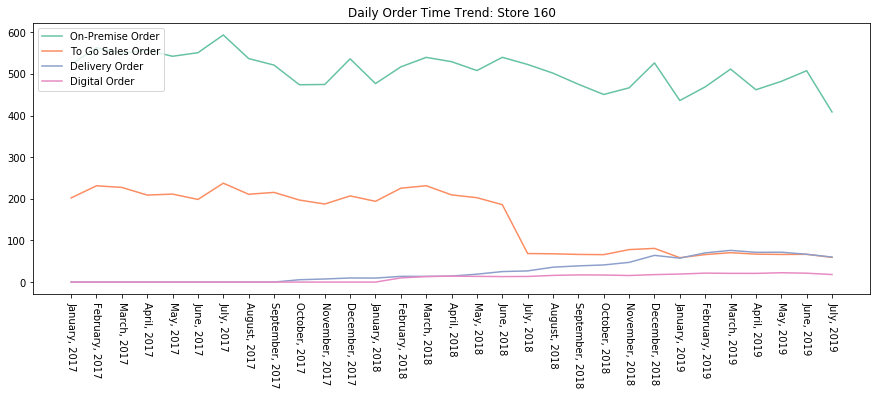

In [21]:
fig = plt.figure(figsize=(15,5))
palatte = plt.get_cmap('Set2')
d = offsite_percent_month[(offsite_percent_month['StoreKey']==160)].sort_values(by=['Year','Month'])
plt.title('Daily Order Time Trend: Store '+str(160))
for j in range(len(c)): 
    plt.plot(d.loc[:,'MonthName'],d.loc[:,c[j]], c = palatte(j),label=(str(c[j])+' Order'))
plt.legend(loc=2) 
plt.xticks(rotation=270)

In [ ]:
offsite_percent.sort_values(by='OffSitePercent',ascending=False)

In [ ]:
offsite_percent.to_csv('Percent Order OffSite.csv')

In [ ]:
offsite_percent_month.to_csv('Percent Order OffSite by Month.csv')

# Daily Trend

In [ ]:
data_day = data[data['BusinessDate']>='2018-01-01'].groupby(['BusinessDate','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()
data_day = data_day.fillna(0)
data_day.columns=['BusinessDate','Delivery','Digital','On-Premise','To Go Sales']

In [ ]:
palatte = plt.get_cmap('Set2')
fig = plt.figure(figsize=(15,5))
d = data_day.sort_values(by='BusinessDate')
plt.title('Average Daily Order per Restaurant')
#tick = list(d.sort_values(by=['Year','Month'])['MonthName'].unique())
#n = len(tick)
plt.stackplot(d['BusinessDate'].astype('str'),[d['On-Premise'],d['To Go Sales'],d['Digital'],d['Delivery']],labels=['On-Premise','To Go Sales','Digital','Delivery'],alpha=0.3)
plt.legend(loc=2)
#plt.xticks(rotation=270)
plt.ylabel('Number of Orders')

# Monthly Trend

In [ ]:
#data['Month'] = (data['BusinessDate'].dt.year.astype('str') + np.where(data['BusinessDate'].dt.month<10,'0'+data['BusinessDate'].dt.month.astype('str'),data['BusinessDate'].dt.month.astype('str')))

In [ ]:
data_month_akom = data.groupby(['AKOMName','Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()

In [ ]:
data_month_akom = data_month_akom.fillna(0)

In [ ]:
data_month_akom.head()

In [ ]:
data_month_akom.columns = ['AKOMName','Year','Month','MonthName','Delivery','Digital','On-Premise','To Go Sales']

In [ ]:
palatte = plt.get_cmap('Set2')
for i in k: 
    fig = plt.figure(figsize=(15,5))
    d = data_month_akom[data_month_akom['AKOMName']==i].sort_values(by=['Year','Month'])
    plt.title('AKOMName: '+i)
    #tick = list(d.sort_values(by=['Year','Month'])['MonthName'].unique())
    n = len(tick)
    plt.stackplot(d['MonthName'],[d['On-Premise'],d['To Go Sales'],d['Digital'],d['Delivery']],labels=['On-Premise','To Go Sales','Digital','Delivery'])
    plt.legend(loc=2)
    plt.xticks(rotation=300)

# Store Month

In [22]:
month_order = data[(data['BusinessDate']>='2017-01-01')&(data['BusinessDate']<'2019-07-01')].groupby(['Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()
month_order = month_order.fillna(0)
month_order.columns = ['Year','Month','MonthName','Delivery','Digital','On-Premise','To Go Sales']

In [23]:
data.groupby(['Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).reset_index()

,Year,Month,MonthName,ChannelName,NumOrder
0,2017,1,"January, 2017",On-Premise,496.377327
1,2017,1,"January, 2017",To Go Sales,141.938433
2,2017,2,"February, 2017",Delivery,19.442251
3,2017,2,"February, 2017",On-Premise,527.134477
4,2017,2,"February, 2017",To Go Sales,152.179487
5,2017,3,"March, 2017",Delivery,20.327177
6,2017,3,"March, 2017",On-Premise,529.533789
7,2017,3,"March, 2017",To Go Sales,150.816330
8,2017,4,"April, 2017",Delivery,20.784425
9,2017,4,"April, 2017",On-Premise,521.570717


In [24]:
month_order['To Go Sales']/(month_order['Delivery']+month_order['Digital']+month_order['On-Premise']+month_order['To Go Sales'])

0     0.222364
1     0.217786
2     0.215244
3     0.194058
4     0.195393
5     0.184358
6     0.203611
7     0.196985
8     0.203141
9     0.202660
10    0.209099
11    0.207653
12    0.204253
13    0.211118
14    0.210553
15    0.183885
16    0.181778
17    0.167309
18    0.075584
19    0.077325
20    0.081737
21    0.084141
22    0.101669
23    0.107516
24    0.079934
25    0.082338
26    0.073583
27    0.073617
28    0.074170
29    0.069766
dtype: float64

In [25]:
month_sales = data[(data['BusinessDate']>='2017-01-01')&(data['BusinessDate']<'2019-07-01')].groupby(['Year','Month','MonthName','ChannelName']).agg({'SalesAmt':'mean'}).unstack().reset_index()
month_sales = month_sales.fillna(0)
month_sales.columns = ['Year','Month','MonthName','Delivery','Digital','On-Premise','To Go Sales']

In [26]:
data

,StoreKey,BusinessDate,ChannelName,DessertOnlyChecksCnt,NumOrder,SalesAmt,Month,Year,MonthName,ChannelType
0,1,2017-01-04,On-Premise,0.0,333,15056.39,1,2017,"January, 2017",On-Premise
1,1,2017-01-04,To Go Sales,0.0,121,3590.27,1,2017,"January, 2017",Off-Premise
2,1,2017-01-05,On-Premise,0.0,357,16221.75,1,2017,"January, 2017",On-Premise
3,1,2017-01-05,To Go Sales,0.0,123,3232.03,1,2017,"January, 2017",Off-Premise
4,1,2017-01-06,On-Premise,0.0,382,17688.98,1,2017,"January, 2017",On-Premise
5,1,2017-01-06,To Go Sales,0.0,132,3545.65,1,2017,"January, 2017",Off-Premise
6,1,2017-01-07,On-Premise,0.0,442,22734.84,1,2017,"January, 2017",On-Premise
7,1,2017-01-07,To Go Sales,0.0,168,4074.71,1,2017,"January, 2017",Off-Premise
8,1,2017-01-08,On-Premise,0.0,357,17864.53,1,2017,"January, 2017",On-Premise
9,1,2017-01-08,To Go Sales,0.0,129,4192.90,1,2017,"January, 2017",Off-Premise


In [27]:
month_sales['To Go Sales']/(month_sales['Delivery']+month_sales['Digital']+month_sales['On-Premise']+month_sales['To Go Sales'])

0     0.119516
1     0.113788
2     0.111795
3     0.101046
4     0.101517
5     0.094175
6     0.097598
7     0.099465
8     0.105734
9     0.106116
10    0.108685
11    0.105213
12    0.104900
13    0.108718
14    0.103948
15    0.091578
16    0.089496
17    0.081629
18    0.049581
19    0.050957
20    0.054825
21    0.057206
22    0.062560
23    0.060896
24    0.053385
25    0.055481
26    0.047895
27    0.048235
28    0.047952
29    0.044381
dtype: float64

In [28]:
import seaborn as sns
pal = sns.color_palette("Set1")
#from matplotlib.colors import ListedColormap
#newcmp = ListedColormap(['#B36924','#8C4799','#F68D2E','#FFBF3F','#BABC16','#93C90E'])

Text(0,0.5,'#Orders')

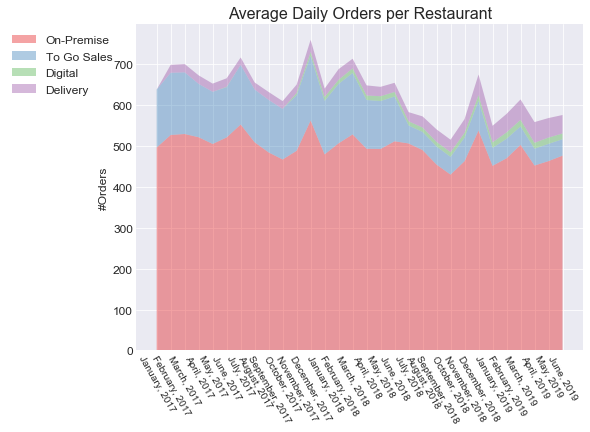

In [30]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(8,6))
d = month_order.sort_values(by=['Year','Month'])
#colors=['#b36924','#ce0058','#840b55','#623b2a']
plt.title('Average Daily Orders per Restaurant',fontsize=16)
tick = list(d.sort_values(by=['Year','Month'])['MonthName'].unique())
n = len(tick)
plt.stackplot(d['MonthName'],[d['On-Premise'],d['To Go Sales'],d['Digital'],d['Delivery']],\
              colors=pal,\
              labels=['On-Premise','To Go Sales','Digital','Delivery'],
             alpha=0.4)
#plt.legend(loc=2)
plt.xticks(rotation=300)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(-0.03,1),fontsize=12)
plt.grid()
plt.ylabel('#Orders',fontsize=12) 
#plt.ylim(0,920)

Text(0,0.5,'#Orders')

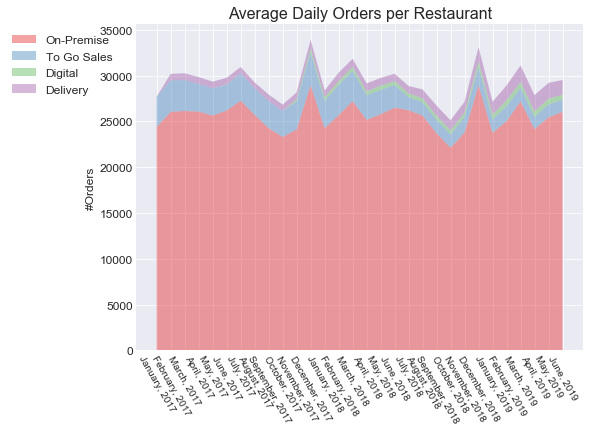

In [32]:
plt.style.use('seaborn-dark')
fig = plt.figure(figsize=(8,6))
d = month_sales.sort_values(by=['Year','Month'])
#colors=['#b36924','#ce0058','#840b55','#623b2a']
plt.title('Average Daily Orders per Restaurant',fontsize=16)
tick = list(d.sort_values(by=['Year','Month'])['MonthName'].unique())
n = len(tick)
plt.stackplot(d['MonthName'],[d['On-Premise'],d['To Go Sales'],d['Digital'],d['Delivery']],\
              colors=pal,\
              labels=['On-Premise','To Go Sales','Digital','Delivery'],
             alpha=0.4)
#plt.legend(loc=2)
plt.xticks(rotation=300)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(-0.03,1),fontsize=12)
plt.grid()
plt.ylabel('#Orders',fontsize=12) 
#plt.ylim(0,920)

In [ ]:
data_month = data[(data['BusinessDate']>='2016-12-01')&(data['BusinessDate']<'2019-07-01')].groupby(['Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()
data_month = data_month.fillna(0)
data_month.columns = ['Year','Month','MonthName','Delivery','Digital','On-Premise','To Go Sales']
data_month

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0, 920)

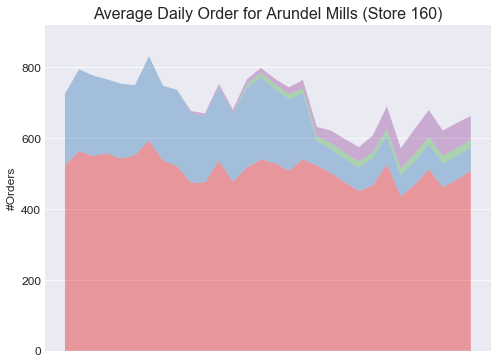

In [33]:
plt.style.use('seaborn-dark')
data_month_store = data[(data['BusinessDate']>='2017-01-01')&(data['BusinessDate']<'2019-07-01')][data['StoreKey']==160].groupby(['Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()
data_month_store = data_month_store.fillna(0)
data_month_store.columns = ['Year','Month','MonthName','Delivery','Digital','On-Premise','To Go Sales']

fig = plt.figure(figsize=(8,6))
d = data_month_store.sort_values(by=['Year','Month'])
plt.title('Average Daily Order for Arundel Mills (Store 160)',fontsize=16)
tick = list(d.sort_values(by=['Year','Month'])['MonthName'].unique())
n = len(tick)
plt.stackplot(d['MonthName'],[d['On-Premise'],d['To Go Sales'],d['Digital'],d['Delivery']],colors = pal,labels=['On-Premise','To Go Sales','Digital','Delivery'],alpha=0.4)
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid()
plt.ylabel('#Orders',fontsize=12) 
plt.ylim(0,920)

In [ ]:
data_month_store = data[data['StoreKey']==160].groupby(['Year','Month','MonthName','ChannelName']).agg({'NumOrder':'mean'}).unstack().reset_index()

In [ ]:
data_month_store

In [ ]:
d